## Logistic Regression

### Sigmoid(Logistic) Function

The **sigmoid function** is a mathematical function that produces an "S" shaped curve (also called a logistic curve) and maps any real-valued input to a range between 0 and 1. It is commonly used in machine learning, especially for binary classification tasks, to model probabilities.

The sigmoid function is defined as:

$
S(x) = \frac{1}{1 + e^{-x}}
$

Where:
- $ S(x) $ is the output of the sigmoid function for the input \( x \).
- $ e $ is the base of the natural logarithm (approximately 2.71828).
- $ x $ is the input to the function, which can be any real number.


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix

### Define sigmoid(Logistic) function

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [5]:
# Generate input values
x = np.linspace(-10, 10, 100)

# Compute the sigmoid of each input value
y = sigmoid(x)

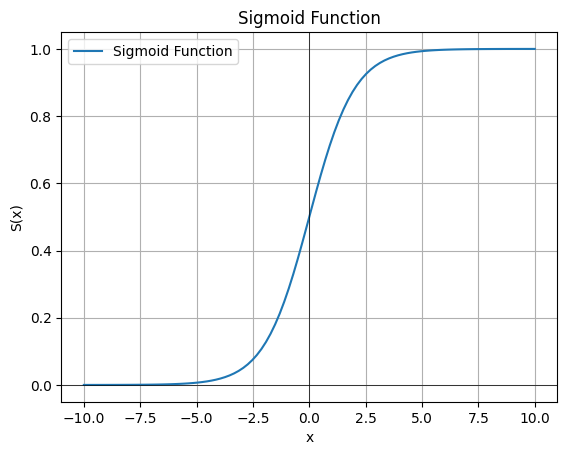

In [7]:
# Plot the sigmoid function
plt.plot(x, y, label='Sigmoid Function')
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('S(x)')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)
plt.legend()
plt.show()

### Logistic Regression

The logistic regression model can be expressed as:

$
P(y=1 | x) = \frac{1}{1 + e^{-(w_0 + w_1 x_1 + w_2 x_2 + ... + w_n x_n)}}
$

Where:
- $P(y=1 | x)$ is the probability that the output is 1, given the input features \(x\).
- $w_0$ is the intercept term (bias).
- $w_1, w_2, ..., w_n$ are the weights (coefficients) for each feature.
- $x_1, x_2, ..., x_n$ are the input features.

The logistic function outputs a value between 0 and 1, which is interpreted as the probability that the input belongs to the positive class (class `1`).

In [12]:
# Logistic Regression Model
def logistic_regression(X, y, num_iterations=1000, learning_rate=0.01):
    m, n = X.shape  # m is number of training examples, n is number of features
    w = np.zeros(n)  # Initialize weights to zero
    b = 0  # Initialize bias to zero

    # Gradient descent
    for i in range(num_iterations):
        # Compute the model's prediction (h(x))
        z = np.dot(X, w) + b  # Linear combination of weights and features
        h = sigmoid(z)  # Apply sigmoid to get a probability

        # Compute the gradients
        dw = (1 / m) * np.dot(X.T, (h - y))  # Gradient of cost with respect to w
        db = (1 / m) * np.sum(h - y)  # Gradient of cost with respect to b

        # Update weights and bias using gradient descent
        w -= learning_rate * dw
        b -= learning_rate * db

        # Optionally print the cost every 100 iterations
        if i % 100 == 0:
            cost = compute_cost(X, y, w, b)
            print(f"Iteration {i}: Cost {cost}")

    return w, b

In [14]:
# Compute the cost function (log loss)
def compute_cost(X, y, w, b):
    m = X.shape[0]
    z = np.dot(X, w) + b
    h = sigmoid(z)
    cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

In [16]:
# Predict function (for binary classification)
def predict(X, w, b):
    z = np.dot(X, w) + b
    h = sigmoid(z)
    return (h >= 0.5).astype(int)  # Return 1 if probability >= 0.5, else 0

In [17]:
# Let's assume we have a small dataset where X is a 2D array (2 features)
# and y is the binary target (0 or 1)
X = np.array([[2.0, 3.0], [1.0, 1.0], [3.0, 2.0], [4.0, 5.0], [1.5, 2.5], [3.5, 3.5]])
y = np.array([0, 0, 0, 1, 0, 1])  # Target labels

In [18]:
# Train the logistic regression model
w, b = logistic_regression(X, y)

# Make predictions
predictions = predict(X, w, b)

Iteration 0: Cost 0.6928697500043495
Iteration 100: Cost 0.6672333206506265
Iteration 200: Cost 0.6434556715949482
Iteration 300: Cost 0.6212699824521329
Iteration 400: Cost 0.6005568603023284
Iteration 500: Cost 0.5812032251025786
Iteration 600: Cost 0.5631028802944169
Iteration 700: Cost 0.5461567971289938
Iteration 800: Cost 0.5302731610047007
Iteration 900: Cost 0.5153672391700078


In [19]:
print("Trained weights:", w)
print("Trained bias:", b)
print("Predictions:", predictions)

Trained weights: [0.20973809 0.21116386]
Trained bias: -1.3450011843424843
Predictions: [0 0 0 1 0 1]


### Plot decision boundary

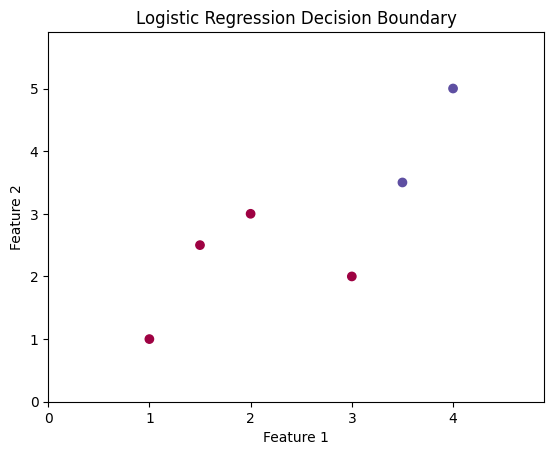

In [20]:
# Visualizing the decision boundary
def plot_decision_boundary(X, y, w, b):
    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

    # Plot the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = predict(np.c_[xx.ravel(), yy.ravel()], w, b)
    Z = Z.reshape(xx.shape)

    plt.contour(xx, yy, Z, levels=[0.5], cmap="Greys", linewidths=2)
    plt.title("Logistic Regression Decision Boundary")
    plt.show()

# Call the plot function to visualize the decision boundary
plot_decision_boundary(X, y, w, b)